In [1]:
import sympy
from phasor.utilities.ipynb.displays import *
from phasor.utilities.ipynb.ipy_sympy import *
import scipy.linalg


import numpy.testing as np_test
import declarative as decl
from declarative.bunch import (
    DeepBunch,
)

#import numpy as np

from phasor import system
from phasor import readouts
from phasor import optics
from phasor.optics.nonlinear_crystal import NonlinearCrystal
from phasor.utilities.print import pprint

from phasor.optics.models.KTP_test_stand import KTPTestStand

Populating the interactive namespace from numpy and matplotlib
Sympy version:  1.0


In [2]:
db = DeepBunch()
db.test.ktp.length.val = 20#np.linspace(0, 20, 100)
db.test.ktp.N_ode = 100
db.test.include_AC = False
sys = system.BGSystem(
    ctree = db,
)
from phasor.optics.models.KTP_test_stand import KTPTestStand
sys.own.test = KTPTestStand()
db = sys.ctree_shadow()
print(sys.test.ktp.ctree_as_yaml())
sys.test.DC_R.DC_readout

N_ode: 100
length: {units: millimeter, val: 20}
nlg: 0.1

Number of states:  4
Number of states:  4
PERTURB:  1
COUPLING_SIZE:  108
PRE-PURGING
FRAC REMOVED:  0.06896551724137931 8
PERTURB:  2
COUPLING_SIZE:  124
PRE-PURGING
FRAC REMOVED:  0.03125 4
PERTURB:  3
COUPLING_SIZE:  124
PRE-PURGING
FRAC REMOVED:  0.03125 4
PRE-PURGING
FRAC REMOVED:  0.1447811447811448 86


array(0.06923723470180326)

In [3]:
print(sys.test.DC_R.DC_readout)
print(sys.test.DC_G.DC_readout)

0.06923723470180326
0.9295115580241431


In [4]:
db = DeepBunch()
db.test.ktp.length.val = np.linspace(0, 25, 100)
db.test.ktp.N_ode = 200
db.test.include_AC = False
sys = system.BGSystem(
    ctree = db,
)
from phasor.optics.models.KTP_test_stand import KTPTestStand
sys.own.test = KTPTestStand()
db = sys.ctree_shadow()
print(sys.test.ktp.ctree_as_yaml())
print(sys.test.DC_R.DC_readout)

N_ode: 200
length:
  units: millimeter
  val: !!python/object/apply:numpy.core.multiarray._reconstruct
    args:
    - !!python/name:numpy.ndarray ''
    - !!python/tuple [0]
    - !!binary |
      Yg==
    state: !!python/tuple
    - 1
    - !!python/tuple [100]
    - !!python/object/apply:numpy.dtype
      args: [f8, 0, 1]
      state: !!python/tuple [3, <, null, null, null, -1, -1, 0]
    - false
    - !!binary |
      AAAAAAAAAAB/pUCtXynQP3+lQK1fKeA/Pvjggw8+6D9/pUCtXynwP9/OkJi3M/Q/Pvjggw8++D+e
      ITFvZ0j8P3+lQK1fKQBAL7rooosuAkDfzpCYtzMEQI/jOI7jOAZAPvjggw8+CEDuDIl5O0MKQJ4h
      MW9nSAxATjbZZJNNDkB/pUCtXykQQNevFKj1KxFAL7rooosuEkCHxLydITETQN/OkJi3MxRAN9lk
      k002FUCP4ziO4zgWQOftDIl5OxdAPvjggw8+GECWArV+pUAZQO4MiXk7QxpARhdddNFFG0CeITFv
      Z0gcQPYrBWr9Sh1ATjbZZJNNHkCmQK1fKVAfQH+lQK1fKSBAq6qqqqqqIEDXrxSo9SshQAO1fqVA
      rSFAL7rooosuIkBbv1Kg1q8iQIfEvJ0hMSNAs8kmm2yyI0DfzpCYtzMkQAvU+pUCtSRAN9lkk002
      JUBj3s6QmLclQI/jOI7jOCZAu+iiiy66JkDn7QyJeTsnQBPzdobEvCdAPvjggw8+KEBq/UqBWr8o

/usr/lib64/python3.5/site-packages/yaml/representer.py:135: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if data in [None, ()]:


Number of states:  4
Number of states:  4
PERTURB:  1
COUPLING_SIZE:  108
PRE-PURGING
FRAC REMOVED:  0.06896551724137931 8
PERTURB:  2
COUPLING_SIZE:  124
PRE-PURGING
FRAC REMOVED:  0.03125 4
PERTURB:  3
COUPLING_SIZE:  124
PRE-PURGING
FRAC REMOVED:  0.03125 4
PRE-PURGING
FRAC REMOVED:  0.1447811447811448 86
[ 1.          0.9993594   0.99744086  0.9942542   0.98981564  0.98414763
  0.97727865  0.96924287  0.9600798   0.94983388  0.93855407  0.9262933
  0.91310803  0.89905766  0.88420404  0.86861091  0.85234333  0.83546722
  0.8180488   0.80015414  0.78184866  0.76319678  0.74426145  0.72510388
  0.70578316  0.68635607  0.66687678  0.64739671  0.62796434  0.60862517
  0.58942157  0.57039279  0.55157489  0.53300084  0.51470049  0.49670066
  0.47902521  0.46169517  0.4447288   0.42814177  0.41194722  0.39615598
  0.38077665  0.36581575  0.35127789  0.33716592  0.32348101  0.31022287
  0.29738982  0.28497896  0.27298628  0.26140677  0.25023454  0.23946296
  0.22908468  0.21909182  0.209475

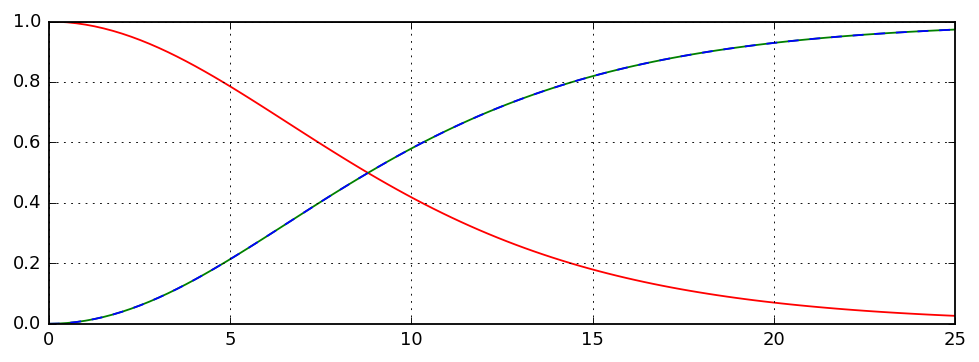

In [5]:
axB = mplfigB(Nrows=1)
test = sys.test
axB.ax0.plot(test.ktp.length_mm.val, test.DC_R.DC_readout, color = 'red')
axB.ax0.plot(test.ktp.length_mm.val, test.DC_G.DC_readout, color = 'green')
axB.ax0.plot(test.ktp.length_mm.val, test.DC_R.DC_readout + test.DC_G.DC_readout, color = 'black')
axB.ax0.plot(test.ktp.length_mm.val, 1 * np.tanh(.100 * test.ktp.length_mm.val)**2, ls = '--', color = 'blue')
#axB.ax0.set_ylim(0, 1.1)

In [6]:
db = DeepBunch()
db.test.ktp.length.val = np.linspace(0, 2.5, 100)
db.test.ktp.nlg = 1
db.test.ktp.N_ode = 100
db.test.include_AC = True
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = KTPTestStand()
db = sys.ctree_shadow()
#print(sys.test.ktp.ctree_as_yaml())

Number of states:  20
Number of states:  20
PERTURB:  1
COUPLING_SIZE:  636
PRE-PURGING
FRAC REMOVED:  0.28054298642533937 248
PERTURB:  2
COUPLING_SIZE:  700
PRE-PURGING
FRAC REMOVED:  0.2584745762711864 244
PERTURB:  3
COUPLING_SIZE:  716
PRE-PURGING
FRAC REMOVED:  0.24152542372881355 228
PRE-PURGING
FRAC REMOVED:  0.4016045304388863 1702
PRE-PURGING
FRAC REMOVED:  0.4016045304388863 1702


/usr/lib64/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/mcculler/local/home_sync/projects/phasor/phasor/readouts/homodyne_AC.py:158: RuntimeWarning: invalid value encountered in true_divide
  ratio          = ((NIQ[1, 0] > 0)*2 - 1) * np.sqrt(disc / (max_eig - min_eig))


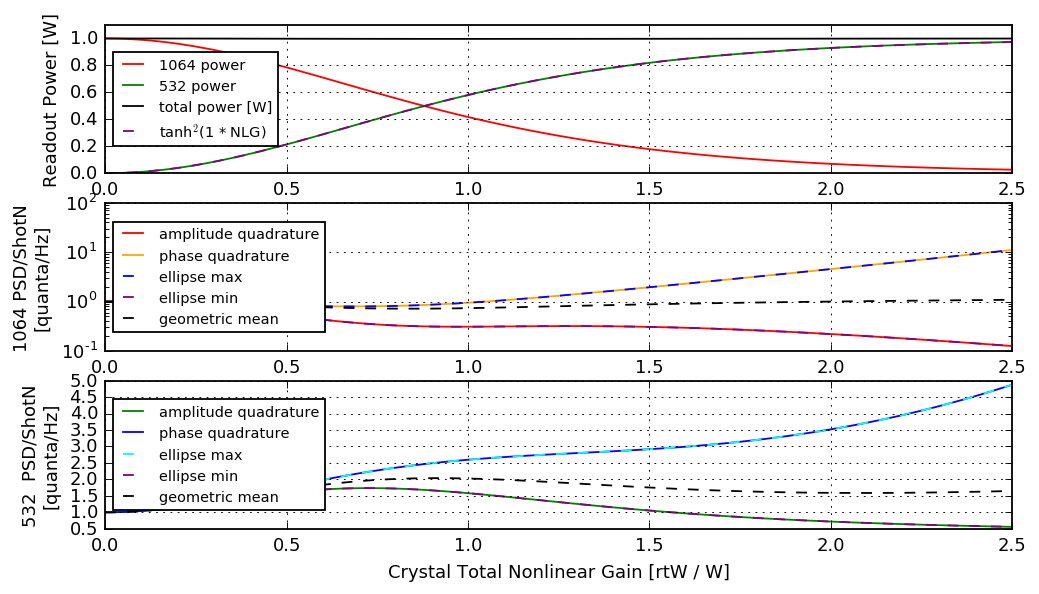

In [7]:
axB = mplfigB(Nrows=3)
test = sys.test
X_NLG = test.ktp.length_mm.val
axB.ax0.plot(
    X_NLG,
    test.DC_R.DC_readout,
    color = 'red',
    label = '1064 power',
)
axB.ax0.plot(
    X_NLG,
    test.DC_G.DC_readout,
    color = 'green',
    label = '532 power',
)
axB.ax0.plot(
    X_NLG,
    test.DC_R.DC_readout + test.DC_G.DC_readout,
    color = 'black',
    label = 'total power [W]',
)
axB.ax0.plot(
    X_NLG,
    1 * np.tanh(1 * test.ktp.length_mm.val)**2,
    ls = '--',
    color = 'purple',
    label = r'tanh$^2$(1 * NLG)',
)
axB.ax0.set_ylim(0, 1.1)
axB.ax0.set_ylabel('Readout Power [W]')
axB.ax0.legend(
    fontsize = 8,
    loc = 'center left'
)
axB.ax1.plot(
    X_NLG,
    test.AC_R.AC_CSD_IQ[0, 0],
    color = 'red',
    label = 'amplitude quadrature',
)
axB.ax1.plot(
    X_NLG,
    test.AC_R.AC_CSD_IQ[1, 1],
    color = 'orange',
    label = 'phase quadrature',
)
axB.ax1.plot(
    X_NLG,
    test.AC_R.AC_CSD_ellipse.max,
    color = 'blue',
    label = 'ellipse max',
    ls = '--'
)
axB.ax1.plot(
    X_NLG,
    test.AC_R.AC_CSD_ellipse.min,
    color = 'purple',
    label = 'ellipse min',
    ls = '--',
)
axB.ax1.plot(
    X_NLG,
    test.AC_R.AC_CSD_ellipse.min**.25 * test.AC_R.AC_CSD_ellipse.max**.25,
    color = 'black',
    ls = '--',
    label = 'geometric mean',
)
axB.ax1.set_ylabel('1064 PSD/ShotN\n[quanta/Hz]')
axB.ax1.set_yscale('log')
axB.ax1.legend(
    fontsize = 8,
    loc = 'center left'
)
axB.ax2.set_ylabel('532  PSD/ShotN\n[quanta/Hz]')
axB.ax2.plot(
    X_NLG,
    test.AC_G.AC_CSD_IQ[0, 0],
    color = 'green',
    label = 'amplitude quadrature',
)
axB.ax2.plot(
    X_NLG,
    test.AC_G.AC_CSD_IQ[1, 1],
    color = 'blue',
    label = 'phase quadrature',
)
axB.ax2.plot(
    X_NLG,
    test.AC_G.AC_CSD_ellipse.max,
    color = 'cyan',
    label = 'ellipse max',
    ls = '--',
)
axB.ax2.plot(
    X_NLG,
    test.AC_G.AC_CSD_ellipse.min,
    color = 'purple',
    label = 'ellipse min',
    ls = '--',
)
axB.ax2.plot(
    X_NLG,
    test.AC_G.AC_CSD_ellipse.min**.5 * test.AC_G.AC_CSD_ellipse.max**.5,
    color = 'black',
    label = 'geometric mean',
    ls = '--',
)
axB.ax2.set_xlabel('Crystal Total Nonlinear Gain [rtW / W]')
axB.ax2.legend(
    fontsize = 8,
    loc = 'center left'
)


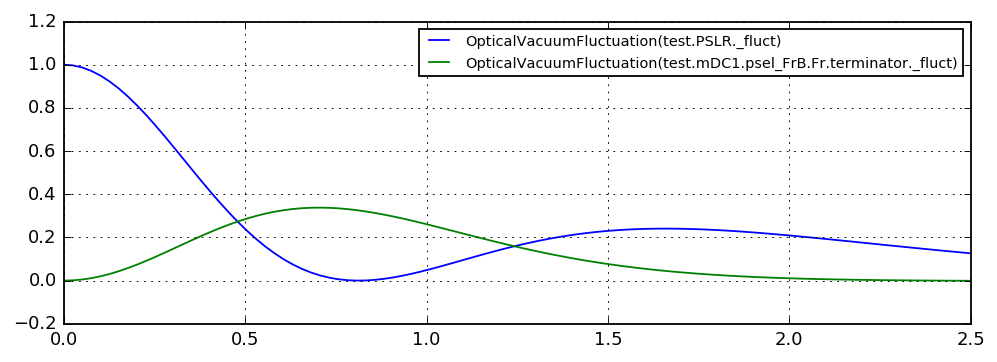

In [8]:
axB = mplfigB()
for src, CSD in sys.test.AC_R.noise.CSD_by_source.items():
    if not np.all(CSD['ps_In', 'ps_In'] == 0):
        axB.ax0.plot(
            sys.test.ktp.length_mm.val, 
            np.ones_like(sys.test.ktp.length_mm.val) * CSD['ps_In', 'ps_In'].real,
            label = str(src),
        )
axB.ax0.legend(
    fontsize = 8,
)
    

In [9]:
db = DeepBunch()
db.test.ktp.length.val = 1
db.test.ktp.nlg = 1
db.test.ktp.N_ode = 100
db.test.include_AC = True
sys = system.BGSystem(
    ctree = db,
)
sys.own.test = KTPTestStand()
db = sys.ctree_shadow()

LSTARR = sys.test.full_noise_matrix()
#print(sys.test.ktp.ctree_as_yaml())

Number of states:  20
Number of states:  20
PERTURB:  1
COUPLING_SIZE:  636
PRE-PURGING
FRAC REMOVED:  0.28054298642533937 248
PERTURB:  2
COUPLING_SIZE:  700
PRE-PURGING
FRAC REMOVED:  0.2584745762711864 244
PERTURB:  3
COUPLING_SIZE:  716
PRE-PURGING
FRAC REMOVED:  0.24152542372881355 228
PRE-PURGING
FRAC REMOVED:  0.4016045304388863 1702
          RI        RQ       GI        GQ
--  --------  --------  -------  --------
RI  0.309651  0         0        0
RQ  0         0.947028  0        0.243494
GI  0         0         1.58019  0
GQ  0         0.243494  0        2.59602


In [10]:
print(sys.AC_R.AC_CSD_IQ[:,:].real)
print(sys.AC_G.AC_CSD_IQ[:,:].real)
print(sys.AC_RGI.AC_CSD_IQ[:,:].real)
print(sys.AC_R.AC_CSD_IQ[:,:].imag)
print(sys.AC_G.AC_CSD_IQ[:,:].imag)
print(sys.AC_RGI.AC_CSD_IQ[:,:].imag)
#print(sys.AC_G.AC_CSD_IQ)

AttributeError: AC_R

In [ ]:
sys = system.BGSystem()
sys.own.PSLR = optics.Laser(
    F = sys.system.F_carrier_1064,
    power_W = 1.,
)
sys.own.PSLG = optics.Laser(
    F = sys.system.F_carrier_1064,
    power_W = 1.,
    multiple = 2,
)
sys.own.dither = optics.AM()

sys.own.ktp = NonlinearCrystal(
    nlg = .1,
    length_mm = np.linspace(0, 10, 100),
    N_ode = 100,
)

sys.own.mDC2 = optics.HarmonicMirror(
    mirror_H1 = optics.Mirror(
        T_hr = 1,
    ),
    mirror_H2 = optics.Mirror(
        T_hr = 0,
    ),
    AOI_deg = 45,
)
sys.own.PD_R = optics.MagicPD()
sys.own.PD_G = optics.MagicPD()
sys.own.hPD_R = optics.HiddenVariableHomodynePD(
    source_port = sys.PSLR.po_Fr.o,
)
sys.own.hPD_G = optics.HiddenVariableHomodynePD(
    source_port = sys.PSLG.po_Fr.o,
)

sys.system.bond_sequence(
    sys.PSLR.po_Fr,
    sys.dither.po_Fr,
    sys.ktp.po_Fr,
    sys.mDC2.po_FrA,
    sys.PD_R.po_Fr,
    sys.hPD_R.po_Fr,
)
sys.system.bond_sequence(
    sys.mDC2.po_FrB,
    sys.PD_G.po_Fr,
    sys.hPD_G.po_Fr,
)
sys.own.DC_R = readouts.DCReadout(
    port = sys.PD_R.Wpd.o,
)
sys.own.DC_G = readouts.DCReadout(
    port = sys.PD_G.Wpd.o,
)
sys.own.AC_G = readouts.HomodyneACReadout(
    portNI = sys.hPD_G.rtWpdI.o,
    portNQ = sys.hPD_G.rtWpdQ.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_R = readouts.HomodyneACReadout(
    portNI = sys.hPD_R.rtWpdI.o,
    portNQ = sys.hPD_R.rtWpdQ.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_RGI = readouts.HomodyneACReadout(
    portNI = sys.hPD_R.rtWpdI.o,
    portNQ = sys.hPD_G.rtWpdI.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_N = readouts.NoiseReadout(
    port_map = dict(
        RI = sys.hPD_R.rtWpdI.o,
        RQ = sys.hPD_R.rtWpdQ.o,
        GI = sys.hPD_G.rtWpdI.o,
        GQ = sys.hPD_G.rtWpdQ.o,
    
)
#print("A")
#pprint(sys.ctree.test.PSL)
#print("sys.DC_R.DC_readout", sys.DC_R.DC_readout, 2)
#print("sys.DC_G.DC_readout", sys.DC_G.DC_readout, 1)


In [ ]:
1.802e-19 - 2*2.36e-20

In [ ]:
sys.AC_RGI.AC_CSD_IQ[0,0]

In [ ]:
sys.AC_RGI.AC_CSD_ellipse

In [ ]:
sys = system.BGSystem()
sys.own.PSLG = optics.Laser(
    F = sys.system.F_carrier_1064,
    power_W = 1.,
    multiple = 2,
)
sys.own.PSLR = optics.Laser(
    F = sys.system.F_carrier_1064,
    power_W = 0.001,
    multiple = 1,
)
sys.own.dither = optics.AM()

sys.own.ktp = NonlinearCrystal(
    nlg = .1,
    length_mm = 10, #np.linspace(0, 20, 2),
    N_ode = 20,
)

sys.own.mDC1 = optics.HarmonicMirror(
    mirror_H1 = optics.Mirror(
        T_hr = 0,
    ),
    mirror_H2 = optics.Mirror(
        T_hr = 1,
    ),
    AOI_deg = 45,
)
sys.own.mDC2 = optics.HarmonicMirror(
    mirror_H1 = optics.Mirror(
        T_hr = 1,
    ),
    mirror_H2 = optics.Mirror(
        T_hr = 0,
    ),
    AOI_deg = 45,
)
sys.own.PD_R = optics.MagicPD()
sys.own.PD_G = optics.MagicPD()
sys.own.hPD_R = optics.HiddenVariableHomodynePD(
    source_port = sys.PSLR.po_Fr.o,
)
sys.own.hPD_G = optics.HiddenVariableHomodynePD()

sys.system.bond_sequence(
    sys.PSLG.po_Fr,
    sys.mDC1.po_FrA,
    sys.dither.po_Fr,
    sys.ktp.po_Fr,
    sys.mDC2.po_FrA,
    sys.PD_R.po_Fr,
    sys.hPD_R.po_Fr,
)
#sys.system.bond_sequence(
#    sys.PSLR.po_Fr,
#    sys.mDC1.po_BkB,
#)
sys.system.bond_sequence(
    sys.mDC2.po_FrB,
    sys.PD_G.po_Fr,
    sys.hPD_G.po_Fr,
)
sys.own.DC_R = readouts.DCReadout(
    port = sys.PD_R.Wpd.o,
)
sys.own.DC_G = readouts.DCReadout(
    port = sys.PD_G.Wpd.o,
)
sys.own.AC_G = readouts.HomodyneACReadout(
    portNI = sys.hPD_G.rtWpdI.o,
    portNQ = sys.hPD_G.rtWpdQ.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_R = readouts.HomodyneACReadout(
    portNI = sys.hPD_R.rtWpdI.o,
    portNQ = sys.hPD_R.rtWpdQ.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_RGI = readouts.HomodyneACReadout(
    portNI = sys.hPD_R.rtWpdI.o,
    portNQ = sys.hPD_G.rtWpdI.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_N = readouts.NoiseReadout(
    port_map = dict(
        RI = sys.hPD_R.rtWpdI.o,
        RQ = sys.hPD_R.rtWpdQ.o,
        GI = sys.hPD_G.rtWpdI.o,
        GQ = sys.hPD_G.rtWpdQ.o,
    )
)
#print("A")
#pprint(sys.ctree.test.PSL)
#print("sys.DC_R.DC_readout", sys.DC_R.DC_readout, 2)
#print("sys.DC_G.DC_readout", sys.DC_G.DC_readout, 1)


In [ ]:
print(sys.AC_R.AC_CSD_IQ[:,:])
print(sys.AC_G.AC_CSD_IQ[:,:])
print(sys.AC_RGI.AC_CSD_IQ[:,:])
print((sys.AC_R.AC_CSD_ellipse.min * sys.AC_R.AC_CSD_ellipse.max)**.5)
print(sys.AC_R.AC_CSD_ellipse.min / (sys.AC_R.AC_CSD_ellipse.min * sys.AC_R.AC_CSD_ellipse.max)**.5)
sys.AC_R.AC_CSD_ellipse

In [ ]:
axB = mplfigB(Nrows=1)
axB.ax0.plot(sys.ktp.length_mm.val, sys.DC_R.DC_readout, color = 'red')
axB.ax0.plot(sys.ktp.length_mm.val, sys.DC_G.DC_readout, color = 'green')
axB.ax0.plot(sys.ktp.length_mm.val, sys.DC_R.DC_readout + sys.DC_G.DC_readout, color = 'black')
axB.ax0.set_ylim(0, 1.1)

In [ ]:
sys = system.BGSystem()
sys.own.PSLG = optics.Laser(
    F = sys.system.F_carrier_1064,
    power_W = 1.,
    multiple = 2,
)
sys.own.PSLR = optics.Laser(
    F = sys.system.F_carrier_1064,
    power_W = 0.001,
    multiple = 1,
)
sys.own.PD_R = optics.MagicPD()
sys.own.PD_G = optics.MagicPD()
sys.own.dither = optics.AM()

sys.own.hPD_R = optics.HiddenVariableHomodynePD(
    source_port = sys.PSLR.po_Fr.o,
)
sys.own.hPD_G = optics.HiddenVariableHomodynePD()

sys.system.bond_sequence(
    sys.PSLG.po_Fr,
    sys.PD_G.po_Fr,
    sys.hPD_G.po_Fr,
)
sys.system.bond_sequence(
    sys.PSLR.po_Fr,
    sys.PD_R.po_Fr,
    sys.hPD_R.po_Fr,
)
sys.own.DC_R = readouts.DCReadout(
    port = sys.PD_R.Wpd.o,
)
sys.own.DC_G = readouts.DCReadout(
    port = sys.PD_G.Wpd.o,
)
sys.own.AC_G = readouts.HomodyneACReadout(
    portNI = sys.hPD_G.rtWpdI.o,
    portNQ = sys.hPD_G.rtWpdQ.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_R = readouts.HomodyneACReadout(
    portNI = sys.hPD_R.rtWpdI.o,
    portNQ = sys.hPD_R.rtWpdQ.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_RGI = readouts.HomodyneACReadout(
    portNI = sys.hPD_R.rtWpdI.o,
    portNQ = sys.hPD_G.rtWpdI.o,
    portD  = sys.dither.Drv.i,
)
sys.own.AC_N = readouts.NoiseReadout(
    port_map = dict(
        RI = sys.hPD_R.rtWpdI.o,
        RQ = sys.hPD_R.rtWpdQ.o,
        GI = sys.hPD_G.rtWpdI.o,
        GQ = sys.hPD_G.rtWpdQ.o,
    )
)
#print("A")
#pprint(sys.ctree.test.PSL)
#print("sys.DC_R.DC_readout", sys.DC_R.DC_readout, 2)
#print("sys.DC_G.DC_readout", sys.DC_G.DC_readout, 1)


In [ ]:
print(sys.AC_R.AC_CSD_IQ[:,:])
print(sys.AC_G.AC_CSD_IQ[:,:])
print(sys.AC_RGI.AC_CSD_IQ[:,:])
print((sys.AC_R.AC_CSD_ellipse.min * sys.AC_R.AC_CSD_ellipse.max)**.5)
print(sys.AC_R.AC_CSD_ellipse.min / (sys.AC_R.AC_CSD_ellipse.min * sys.AC_R.AC_CSD_ellipse.max)**.5)
sys.AC_R.AC_CSD_ellipse

In [ ]:
from phasor.optics.models.KTP_test_stand import KTPTestStand
sys = system.BGSystem()
sys.own.test = KTPTestStand()
LSTARR = sys.test.full_noise_matrix()